### Importing Modules

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [150]:
%matplotlib inline

### Loading Dataset

In [151]:
df = pd.read_csv("../data/raw/musics.csv")

### Dataset Quality Analysis

In [152]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [154]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


### Data Cleaning

In [155]:
df = df.drop(columns=["track_popularity", "playlist_name"])

In [156]:
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [157]:
df = df.dropna(subset=['track_name', 'track_artist', 'track_album_name'])

In [158]:
df['track_album_release_year'] = pd.to_datetime(df['track_album_release_date'], errors='coerce').dt.year.fillna(0).astype(int)

In [159]:
df = df.drop(columns=['track_album_release_date'])

In [160]:
df['track_album_release_year'].unique()

array([2019, 2018, 2017, 2016, 2014, 2012, 2015,    0, 2013, 2011, 2010,
       2008, 2020, 2007, 2009, 1995, 1999, 2000, 1994, 1993, 1996, 1992,
       1997, 2001, 2006, 2002, 2005, 1990, 2004, 2003, 1984, 1982, 1979,
       1974, 1987, 1978, 1969, 1986, 1983, 1998, 1991, 1980, 1985, 1981,
       1988, 1989, 1970, 1971, 1973, 1975, 1976, 1972, 1977, 1968, 1965,
       1967, 1964, 1966, 1963, 1958, 1961, 1957])

### Fixing Inconsistencies

In [161]:
def check_value_ranges(df):
    expected_ranges = {
        'danceability': (0, 1),
        'energy': (0, 1),
        'key': (0, 11),
        'loudness': (-50, 10),
        'mode': (0, 1), 
        'speechiness': (0, 1),
        'acousticness': (0, 1),
        'instrumentalness': (0, 1),
        'liveness': (0, 1),
        'valence': (0, 1),
        'tempo': (30, 300),  
        'duration_ms': (4000, 600000),
        'track_album_release_year': (1950, 2020)
    }

    for column, (min_val, max_val) in expected_ranges.items():
        if column in df.columns:
            invalid_values = df[(df[column] < min_val) | (df[column] > max_val)]
            if not invalid_values.empty:
                print(f"Invalid values for {column} :")
                print(invalid_values[[column]].head())

check_value_ranges(df)

Invalid values for tempo :
       tempo
11363    0.0
Invalid values for track_album_release_year :
     track_album_release_year
151                         0
749                         0
750                         0
751                         0
753                         0


In [162]:
df = df[df['track_album_release_year'] != 0]

In [163]:
df = df[df['tempo'] != 0]

### Removing Duplicates

In [164]:
duplicate_tracks = df[df.duplicated(subset=['track_id'], keep=False)]
duplicate_tracks.head()

,track_id,track_name,track_artist,track_album_id,track_album_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_album_release_year
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,...,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,...,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,...,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019
5,7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.919,...,-5.385,1,0.1270,0.0799,0.000000,0.1430,0.585,124.982,163049,2019
7,6b1RNvAcJjQH73eZO4BLAB,Post Malone (feat. RANI) - GATTÜSO Remix,Sam Feldt,6703SRPsLkS4bPtMFFJes1,Post Malone (feat. RANI) [GATTÜSO Remix],37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.542,0.903,...,-2.419,0,0.0434,0.0335,0.000005,0.1110,0.367,127.936,207619,2019


In [165]:
df = df.drop_duplicates(subset=['track_id'])

### Standardization

In [166]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_album_release_year
count,26670.000000,26670.000000,26670.000000,26670.000000,26670.000000,26670.000000,26670.000000,26670.000000,26670.000000,26670.000000,26670.000000,26670.000000,26670.000000
mean,0.655522,0.698727,5.362730,-6.741388,0.560967,0.109076,0.177795,0.093695,0.190799,0.504576,121.022485,224702.809749,2012.104012
std,0.144655,0.183389,3.616143,2.999386,0.496278,0.102986,0.223261,0.236083,0.155623,0.233911,26.882083,60390.293664,10.246198
min,0.077100,0.000175,0.000000,-46.448000,0.000000,0.022400,0.000001,0.000000,0.009360,0.000010,35.477000,29493.000000,1957.000000
25%,0.564000,0.580000,2.000000,-8.206000,0.000000,0.041400,0.014500,0.000000,0.092900,0.323000,99.984000,186681.000000,2010.000000
50%,0.672000,0.722000,6.000000,-6.197000,1.000000,0.063700,0.080200,0.000020,0.127000,0.506000,122.010000,215107.000000,2016.000000
75%,0.761000,0.843000,9.000000,-4.667000,1.000000,0.136000,0.261000,0.007025,0.248000,0.688000,133.970000,252540.000000,2019.000000
max,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000,2020.000000


In [167]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

In [168]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_album_release_year
count,2.667000e+04,2.667000e+04,26670.000000,2.667000e+04,26670.000000,2.667000e+04,2.667000e+04,2.667000e+04,2.667000e+04,2.667000e+04,2.667000e+04,2.667000e+04,26670.000000
mean,-7.939323e-16,1.023054e-16,5.362730,-3.367552e-16,0.560967,7.246630e-17,-1.875598e-16,7.672902e-17,5.754677e-17,2.259243e-16,-2.472380e-16,-9.377992e-17,2012.104012
std,1.000019e+00,1.000019e+00,3.616143,1.000019e+00,0.496278,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,10.246198
min,-3.998698e+00,-3.809193e+00,0.000000,-1.323850e+01,0.000000,-8.416404e-01,-7.963624e-01,-3.968808e-01,-1.165912e+00,-2.157123e+00,-3.182309e+00,-3.232531e+00,1957.000000
25%,-6.326997e-01,-6.474180e-01,2.000000,-4.883131e-01,0.000000,-6.571463e-01,-7.314211e-01,-3.968808e-01,-6.290923e-01,-7.762753e-01,-7.826358e-01,-6.296131e-01,2010.000000
50%,1.139174e-01,1.269054e-01,6.000000,1.815032e-01,1.000000,-4.406084e-01,-4.371411e-01,-3.967956e-01,-4.099689e-01,6.086697e-03,3.673574e-02,-1.588995e-01,2016.000000
75%,7.291851e-01,7.867162e-01,9.000000,6.916172e-01,1.000000,2.614403e-01,3.726886e-01,-3.671237e-01,3.675657e-01,7.841735e-01,4.816501e-01,4.609634e-01,2019.000000
max,2.263898e+00,1.642834e+00,11.000000,2.672727e+00,1.000000,7.854830e+00,3.655903e+00,3.813582e+00,5.174143e+00,2.079560e+00,4.405155e+00,4.853639e+00,2020.000000


### Exploratory Data Analysis

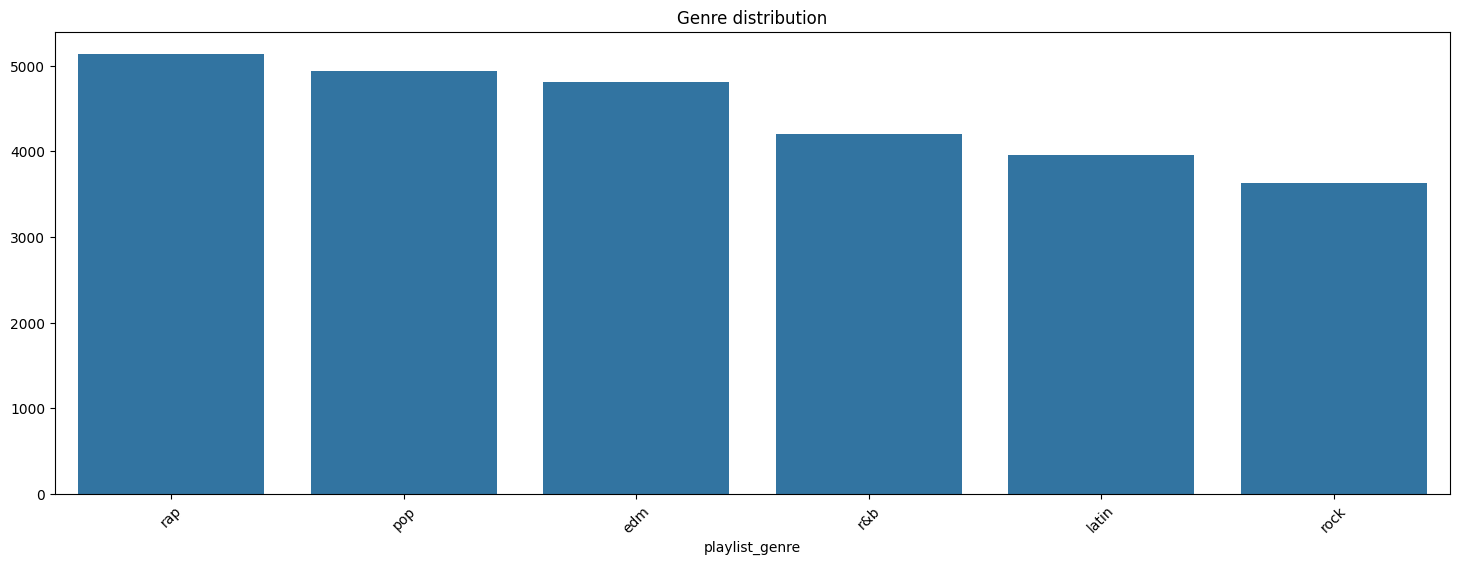

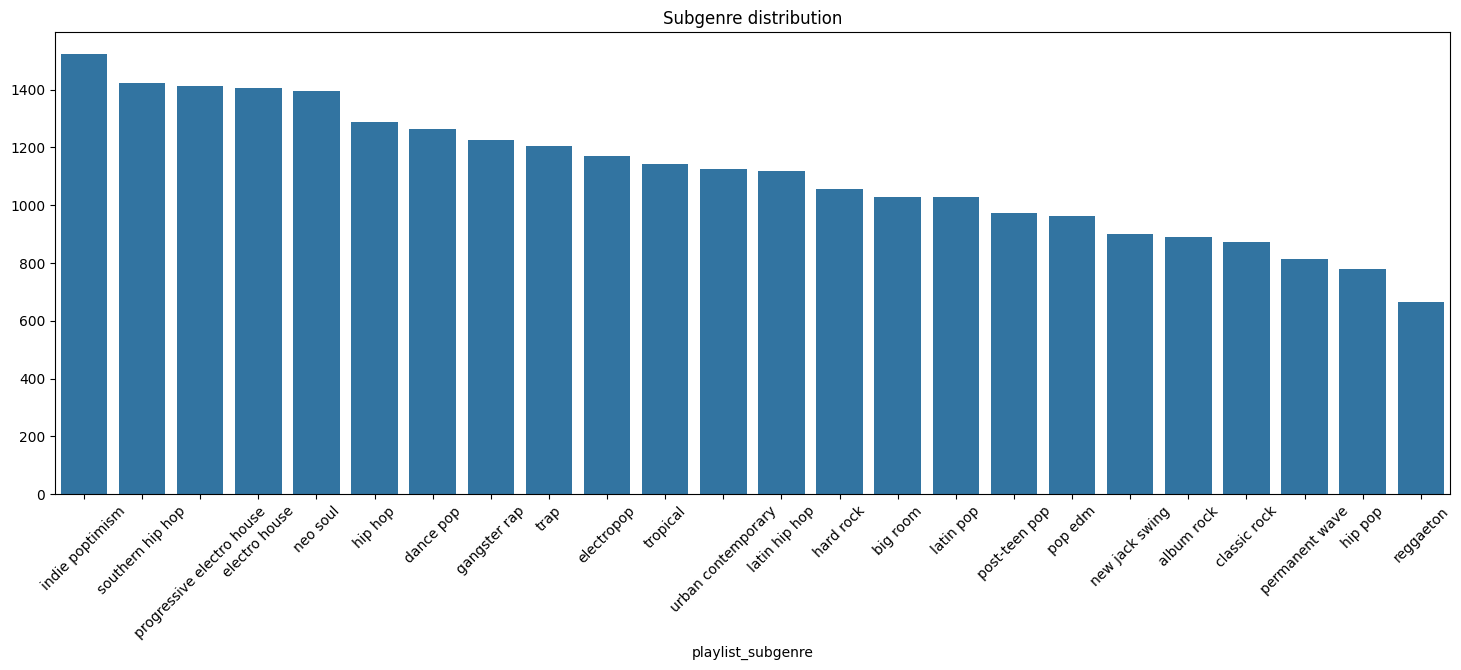

In [169]:
genre_counts = df['playlist_genre'].value_counts()
plt.figure(figsize=(18,6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title("Genre distribution")
plt.xticks(rotation=45)
plt.show()

subgenre_counts = df['playlist_subgenre'].value_counts()
plt.figure(figsize=(18,6))
sns.barplot(x=subgenre_counts.index, y=subgenre_counts.values)
plt.title("Subgenre distribution")
plt.xticks(rotation=45)
plt.show()

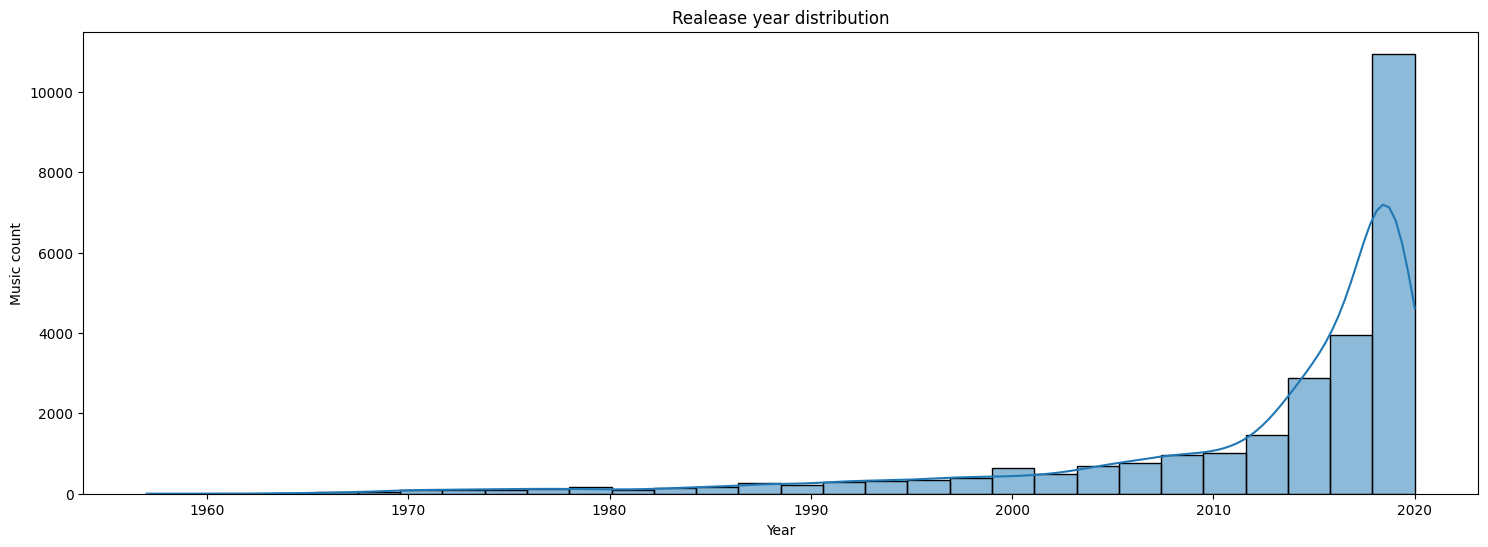

In [170]:
plt.figure(figsize=(18,6))
sns.histplot(df['track_album_release_year'], bins=30, kde=True)
plt.title("Realease year distribution")
plt.xlabel("Year")
plt.ylabel("Music count")
plt.show()

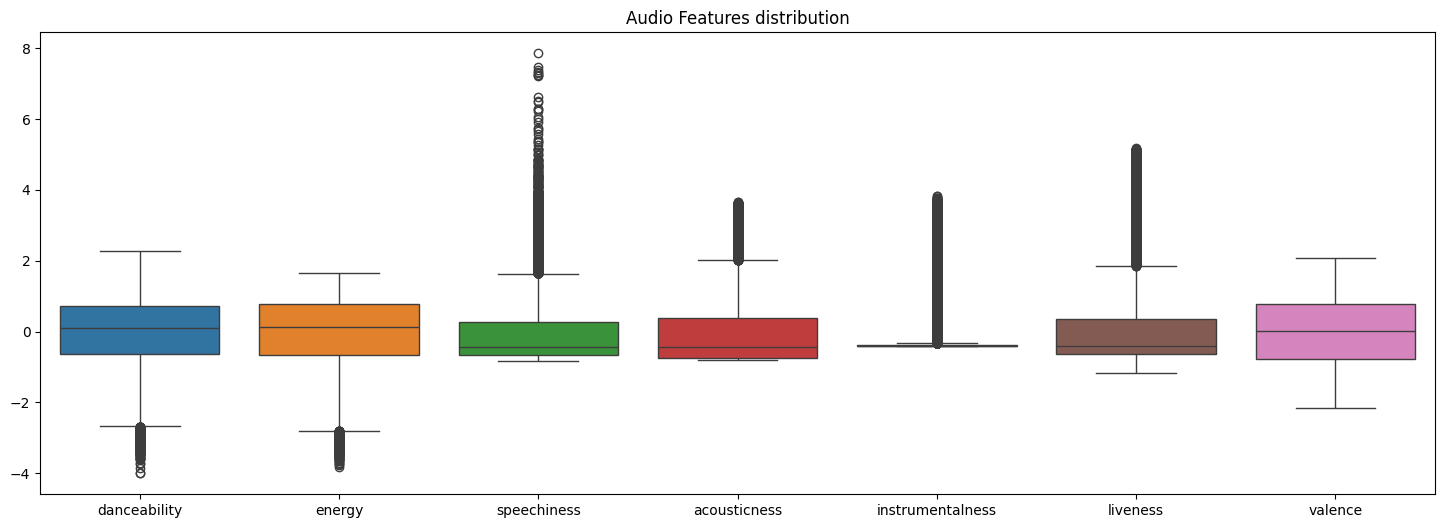

In [171]:
plt.figure(figsize=(18,6))
sns.boxplot(data=df[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']])
plt.title("Audio Features distribution")
plt.show()

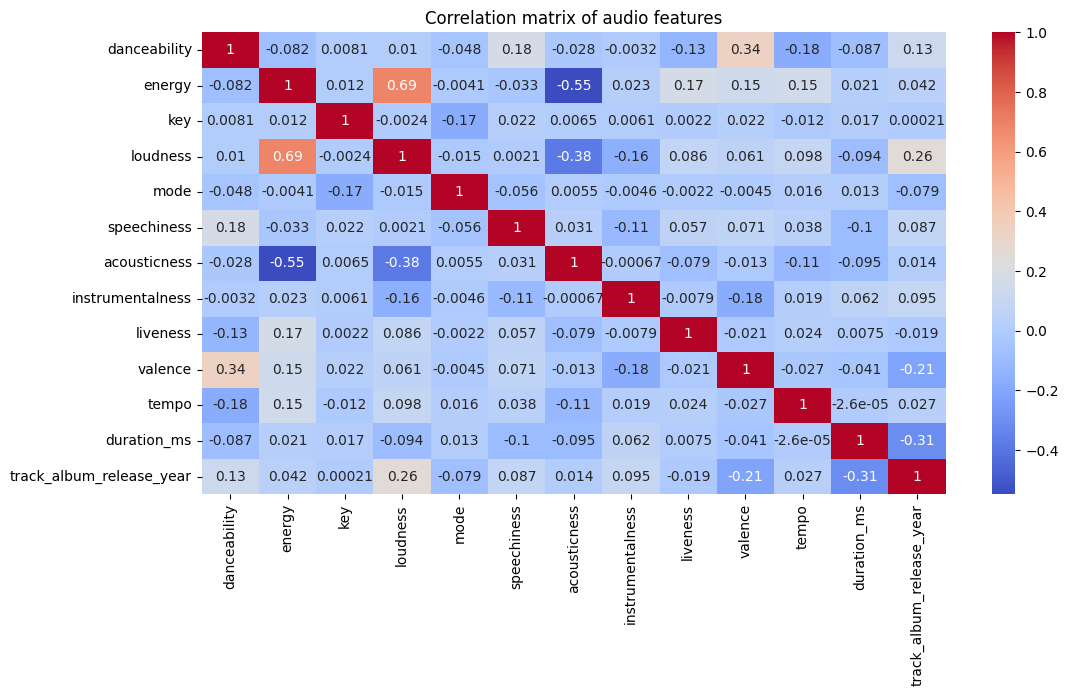

In [172]:
plt.figure(figsize=(12,6))
sns.heatmap(df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'track_album_release_year']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation matrix of audio features") 
plt.show()

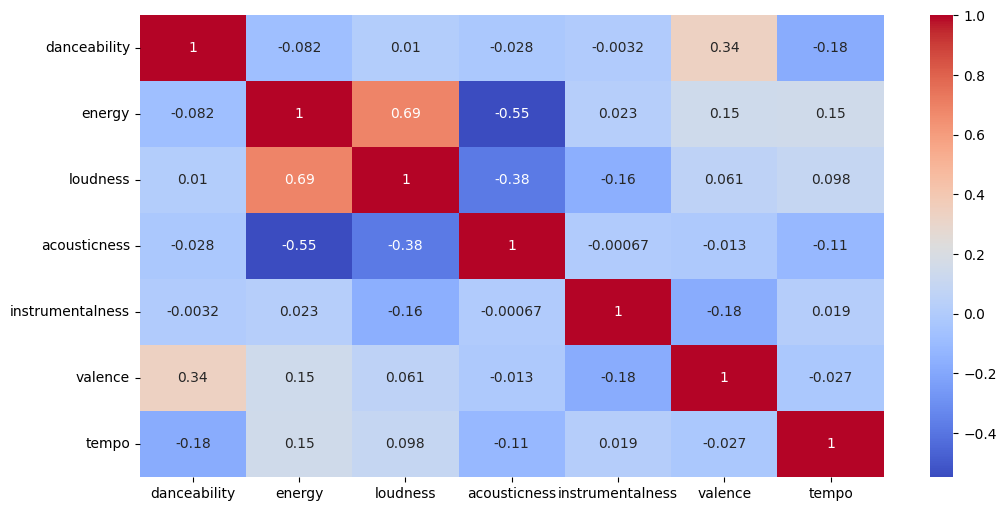

In [174]:
plt.figure(figsize=(12,6))
sns.heatmap(df[['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'tempo']].corr(), annot=True, cmap='coolwarm')
plt.show()

### Clustering

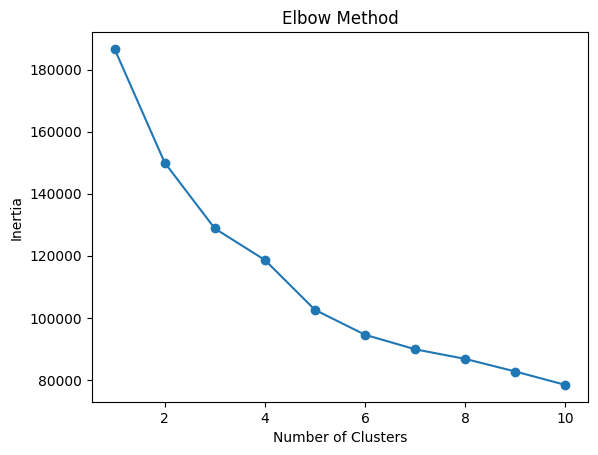

In [179]:
features = df[['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'tempo']]

inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

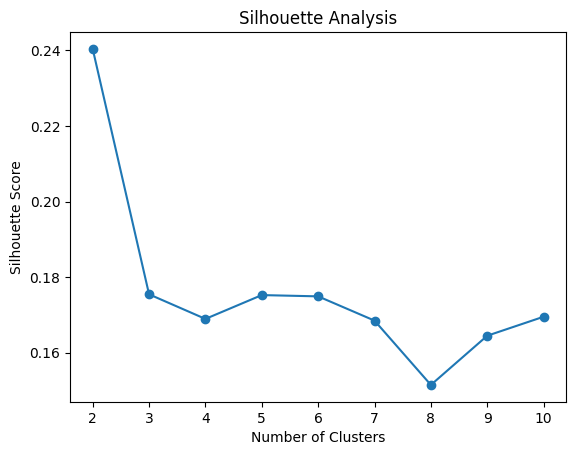

In [178]:
silhouette_scores = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    labels = kmeans.fit_predict(features)
    silhouette_scores.append(silhouette_score(features, labels))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

In [186]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['emotion'] = kmeans.fit_predict(features)

In [187]:
emotion_means = df.groupby('emotion')[['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'tempo']].mean()
print(emotion_means)

         danceability    energy  loudness  acousticness  instrumentalness  \
emotion                                                                     
0            0.551288  0.460781  0.452571     -0.133014         -0.330606   
1           -0.825681  0.583509  0.519771     -0.476738         -0.295950   
2            0.059471  0.487879 -0.049593     -0.488035          2.780549   
3           -0.526922 -1.632699 -1.380817      2.148511          0.232266   
4            0.448602 -0.716569 -0.551855     -0.043913         -0.329621   

          valence     tempo  
emotion                      
0        0.902913 -0.187263  
1       -0.504309  0.584972  
2       -0.535198  0.150664  
3       -0.482653 -0.230775  
4       -0.172050 -0.382856  


In [188]:
print(df['emotion'].unique())

[0 1 4 2 3]


In [189]:
emotion_labels = {
    0: 'Happy',
    1: 'Sad',
    2: 'Epic',
    3: 'Chill',
    4: 'Exciting'
}

df['emotion'] = df['emotion'].replace(emotion_labels)

In [190]:
print(df['emotion'].unique())

['Happy' 'Sad' 'Exciting' 'Epic' 'Chill']
